In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

# from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')



6

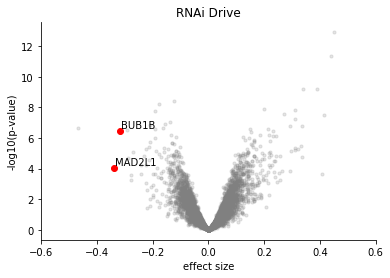

In [4]:
##########################################################################################
######################################### figex 1b #######################################
##########################################################################################



drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
#rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)

fix,ax = plt.subplots()
plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')
#plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.6,.6)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Drive')
plotting.simpleaxis(ax)

texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)']):#,'KIF18A (81930)']):
    texts.append(plt.text(drive.loc[txt,'EffectSize'], -np.log10(drive.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
#plt.savefig('fig1c_init/rnai_achilles.pdf')



No handles with labels found to put in legend.


5.919765391225442e-17


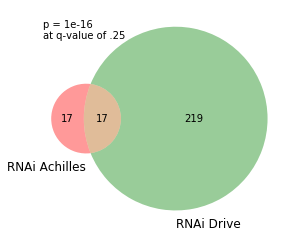

In [8]:
##########################################################################################
######################################### figex 1c #######################################
##########################################################################################
from matplotlib_venn import venn2
from scipy import stats
drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)


sh = set(rnai.index&drive.index)


rnai_ = rnai.loc[sh][rnai.loc[sh,'EffectSize'] < -.1]
drive_ = drive.loc[sh][drive.loc[sh,'EffectSize'] < -.1]


thresh = .25
_100 = rnai_[rnai_.loc[:,'q.value'] < thresh].sort_values('EffectSize').iloc[0:100]

dataset_b = drive_[drive_.loc[:,'q.value'] < thresh]

both = set(set(_100.index) & set(dataset_b.index))
v=venn2(subsets = (len(set(_100.index) - both), len(set(dataset_b.index) - both), len(set(set(_100.index) & set(dataset_b.index)))), set_labels = ('RNAi Achilles','RNAi Drive'))



a_sig = set(_100.index)
b_sig = set(dataset_b.index)
a_not_sig = set(sh) - a_sig
b_not_sig = set(sh) - b_sig

oddsratio, pvalue = stats.fisher_exact([[len(a_sig & b_sig), len(a_sig & b_not_sig)],
                                        [len(a_not_sig & b_sig), len(a_not_sig & b_not_sig)]])

print(pvalue)

plt.legend(title='p = '+ str(round(pvalue,16)) + '\nat q-value of .25',frameon=False,loc='upper left')

#plt.savefig('fig1d/achilles_drive_100_.25_-.1.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 5.635164650878929e-07
RNAi Achilles p-value for MAD2L1: 0.00012537549828545578


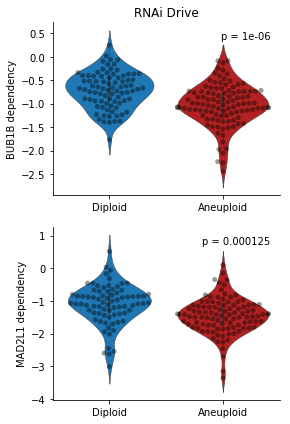

In [13]:
##########################################################################################
######################################### figex 1e #######################################
##########################################################################################


fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,6)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
# plt.savefig('fig2a/rnai_drive_lineage_regressed_out.pdf')



6

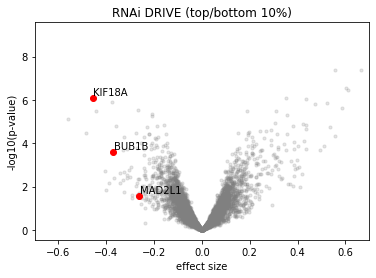

In [3]:
##########################################################################################
######################################### figex 1f #######################################
##########################################################################################


drive = pd.read_csv('10%/lim_res_rnai_drvie_10_percent_NEW.csv',index_col=0)
rnai = pd.read_csv('10%/lim_res_rnai_achilles_10_percent_NEW.csv',index_col=0)

# from adjustText import adjust_text





fix,ax = plt.subplots()
plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')
plt.scatter(drive.loc['KIF18A (81930)','EffectSize'],-np.log10(drive.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.7,.7)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi DRIVE (top/bottom 10%)')
# plotting.simpleaxis(ax)


texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']):
    texts.append(plt.text(drive.loc[txt,'EffectSize'], -np.log10(drive.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
# plt.savefig('review_plots/rnai_drive_10_percent_kif18a_NEW.png')




No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi drive p-value for BUB1B: 0.0004887792472224486
RNAi drive p-value for MAD2L1: 0.037339850782972764


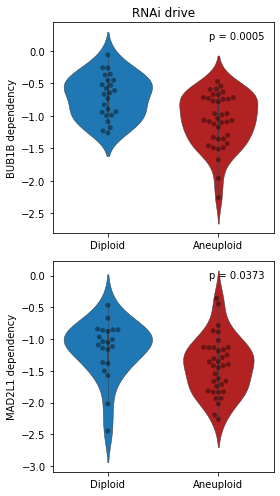

In [4]:
##########################################################################################
######################################### figex 1g #######################################
##########################################################################################

fig,axx = plt.subplots(2,1,figsize=(4,7))

from scipy import stats


anot = tc.get(name='aneuploidy-data-d0b9', version=19, file='using_ten_percent_NEW')#pd.read_csv('aneuploidy_data_compact.csv',index_col=0)
genes = ['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']
gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes]
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes]


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive_.index)
temp = gene_effect_rnai_drive_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

# plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

# plotting.simpleaxis(axx[1])



# sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[2],order=['Diploid','Aneuploid'],palette=my_pal)
# sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[2],order=['Diploid','Aneuploid'])
# #axx[1].set_title('RNAi drive')
# axx[2].set_ylabel('KIF18A dependency')
# axx[2].set_xlabel('')

# plotting.simpleaxis(axx[2])



plt.tight_layout()


tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive_.loc[falsee,'BUB1B (701)'])
print('RNAi drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
# tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'KIF18A (81930)'].dropna(),gene_effect_rnai_drive_.loc[falsee,'KIF18A (81930)'].dropna())
# print('RNAi drive p-value for KIF18A: ' + str(p_val))
# axx[2].legend(title='p = '+ str(round(p_val,6)),frameon=False,loc='lower left')




# plt.savefig('review_plots/rnai_drive_10_percent_NEW.pdf')



No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.2612687195013316
p-value for MAD2L1: 0.0012271722567593936


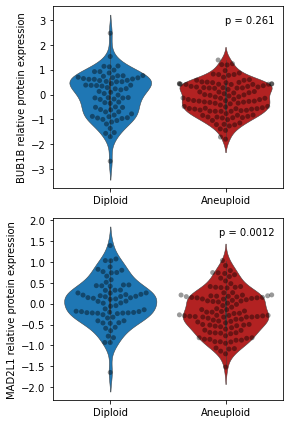

In [5]:
##########################################################################################
######################################### figex 1h #######################################
##########################################################################################

### violin plots protein data


protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')
protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]
protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T
protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]





fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index)
temp = protein_quant_current_normalized.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



sns.violinplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B relative protein expression')
axx[1].set_ylabel('MAD2L1 relative protein expression')



from scipy import stats
tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'BUB1B'],protein_quant_current_normalized.loc[falsee,'BUB1B'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'MAD2L1'],protein_quant_current_normalized.loc[falsee,'MAD2L1'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)


# plotting.simpleaxis(axx[0])
# plotting.simpleaxis(axx[1])
plt.tight_layout()





/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.26378027093402934        p = 0.0003888401638310891
MAD2L1 dependency and expression : r = 0.40381940443136033        p = 2.495226526206009e-08


No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.3613985870208916        p = 2.7696239226739648e-08
MAD2L1 dependency and expression : r = 0.31164662893518275        p = 2.07006029653576e-06


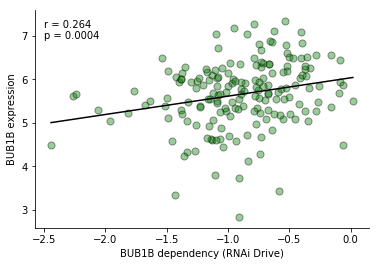

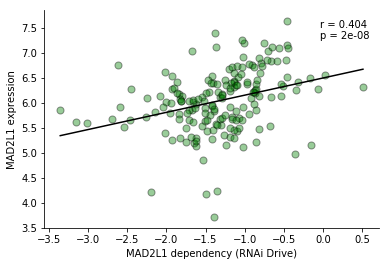

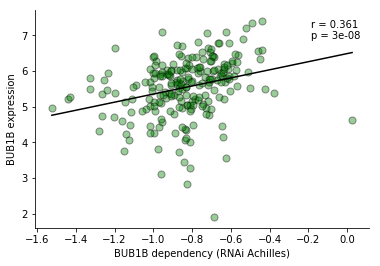

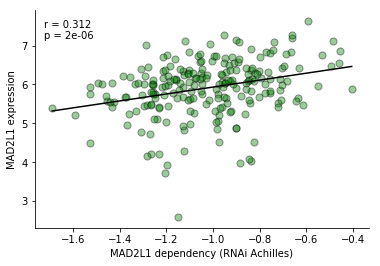

In [16]:
##########################################################################################
######################################### figex 1i #######################################
##########################################################################################

# note that this is using spearman instead of pearson!

public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_drive_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_drive_SPEARMAN.pdf')




#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_achilles.index) 
without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Achilles)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)




# plt.savefig('fig2c/bub1b_exp_dep_rnai_achilles_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Achilles)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



# plt.savefig('fig2c/mad2l1_exp_dep_rnai_achilles_SPEARMAN.pdf')




No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.1086449383190131        p = 0.08647431531960485
MAD2L1 dependency and expression : r = 0.25749570393126286        p = 3.777916219837668e-05
BUB1B dependency and expression : r = 0.14399236335709414        p = 0.015709570569801202
MAD2L1 dependency and expression : r = 0.23999502428365901        p = 4.809875577189081e-05


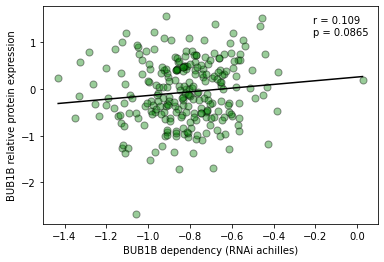

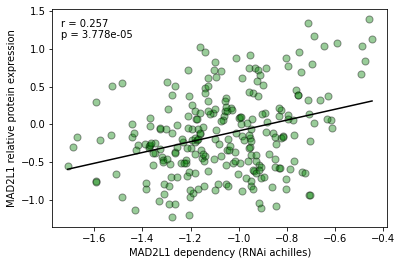

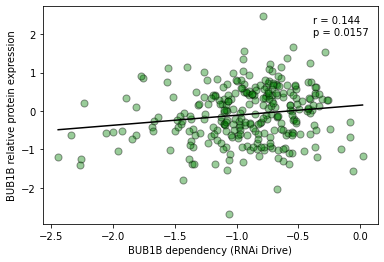

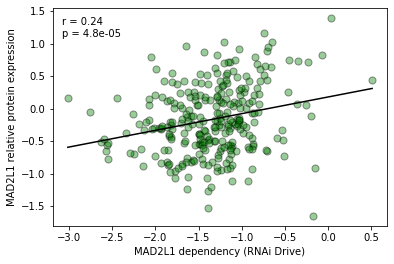

In [6]:
##########################################################################################
######################################### figex 1j #######################################
##########################################################################################


### protein data ###

# look at protein data 


protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')
protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]
protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T
protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]


gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')




shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_achilles.index) 
without_na = shared#gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi achilles)')
plt.ylabel('BUB1B relative protein expression')
# plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)





fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi achilles)')
plt.ylabel('MAD2L1 relative protein expression')
# plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



### drive dataset


shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B relative protein expression')
# plotting.simpleaxis(ax)

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 relative protein expression')
# plotting.simpleaxis(ax)

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)











p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

breast_Diploid v.s. breast_Aneuploid: t-test independent samples, P_val=7.611e-02 stat=1.857e+00
soft_tissue_Diploid v.s. soft_tissue_Aneuploid: t-test independent samples, P_val=3.933e-01 stat=8.855e-01
gastric_Diploid v.s. gastric_Aneuploid: t-test independent samples, P_val=2.092e-01 stat=1.295e+00
uterus_Diploid v.s. uterus_Aneuploid: t-test independent samples, P_val=2.075e-01 stat=1.300e+00
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=5.319e-01 stat=-6.374e-01
central
nervous
system_Diploid v.s. central
nervous
system_Aneuploid: t-test independent samples, P_val=8.118e-01 stat=2.403e-01
lung_Diploid v.s. lung_Aneuploid: t-test independent samples, P_val=8.839e-01 stat=-1.464e-01
blood_Diploid v.s. blood_Aneuploid: t-test independent samples, P_val=6.412e-01 stat=4.688e-01
ovary_Diploid v.s. ovary

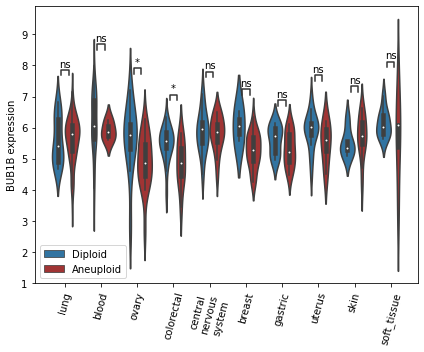

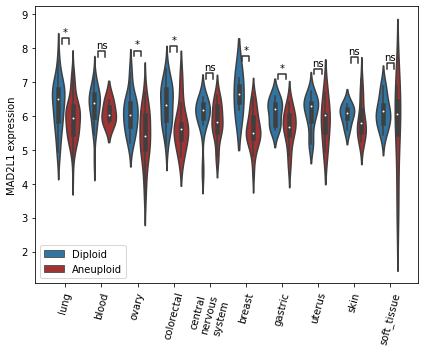

In [7]:
##########################################################################################
######################################### figex 1k #######################################
##########################################################################################

### violin plots lineage ###


# can be tweaked do only look at specific lineages

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)
anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']
# switch to arxspan IDs
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')
sample_info.index = sample_info.loc[:,'CCLE_Name'] 
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]
sample_info_ = sample_info.copy()
sample_info_.index = sample_info_.loc[:,'DepMap_ID']


public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')
t = set(public_19Q4_proteincoding_tpm.index & anot.index)
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.loc[t].copy()

public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]#gene_effect_rnai_drive.loc[shared]





shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]#gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']


drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'lung' \
        and drive_box.loc[x,'lineage'] != 'blood' and drive_box.loc[x,'lineage'] != 'gastric' \
        and drive_box.loc[x,'lineage'] != 'uterus' and drive_box.loc[x,'lineage'] != 'ovary' \
        and drive_box.loc[x,'lineage'] != 'colorectal'  and drive_box.loc[x,'lineage'] != 'central_nervous_system' \
        and drive_box.loc[x,'lineage'] != 'breast' and drive_box.loc[x,'lineage'] != 'skin' and drive_box.loc[x,'lineage'] != 'soft_tissue':
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['lung','blood','ovary','colorectal','central\nnervous\nsystem','breast','gastric','uterus','skin','soft_tissue' ]
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order,comparisons_correction=None)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B expression')
plt.xlabel('')


# plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order,comparisons_correction=None)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 expression')
plt.xlabel('')


# plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()




